بسم الله الرحمن الرحيم و به نستعين و الصلاه و السلام علي أشرف المرسلين سيدنا محمد وعلي أله و صحبه 

# IMPORT THE LIBERARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder


# date insertion

In [2]:
df=pd.read_csv('sales_for_course.csv')

In [3]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


# over veiw

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [5]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


# Pre-processing

detect duplicates

In [6]:
duplicates = df[df.duplicated()]
duplicates

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1


In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

detect outliar

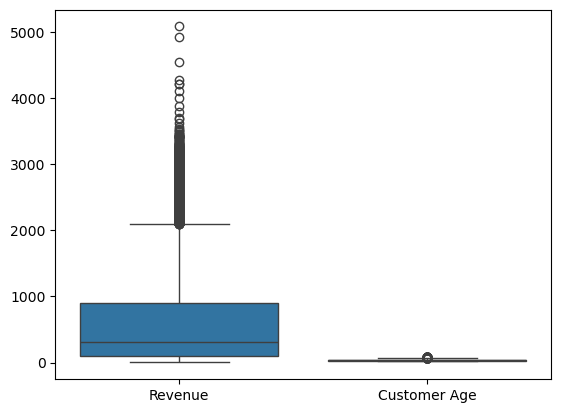

In [8]:
sns.boxplot(data=df[["Revenue","Customer Age"]])
plt.show()

this is not outliar 

this is normal increasing in the revenue

treat with null

In [9]:
df.isnull().sum()



index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [10]:
df=df.dropna(axis=0)

In [11]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2574 entries, 312 to 2935
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             2574 non-null   int64  
 1   Date              2574 non-null   object 
 2   Year              2574 non-null   float64
 3   Month             2574 non-null   object 
 4   Customer Age      2574 non-null   float64
 5   Customer Gender   2574 non-null   object 
 6   Country           2574 non-null   object 
 7   State             2574 non-null   object 
 8   Product Category  2574 non-null   object 
 9   Sub Category      2574 non-null   object 
 10  Quantity          2574 non-null   float64
 11  Unit Cost         2574 non-null   float64
 12  Unit Price        2574 non-null   float64
 13  Cost              2574 non-null   float64
 14  Revenue           2574 non-null   float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memory usa

# delete columns aren`t importante 

In [12]:
df=df.drop(columns=["index","Column1","Year"])

In [13]:
df.head()


,Date,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
312,1/11/2016,January,40.0,M,France,Yveline,Bikes,Road Bikes,3.0,567.0,790.0,1701.0,2370.0
313,1/11/2016,January,40.0,M,France,Yveline,Accessories,Helmets,2.0,192.5,199.0,385.0,398.0
314,1/18/2016,January,40.0,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.0,1511.5,2320.0,3023.0
315,1/18/2016,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.0,147.0,230.0,294.0
316,1/18/2016,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.0,167.0,140.0,167.0


# create columns to date 

In [14]:
df["Date"] = pd.to_datetime(df["Date"])
df= df.sort_values(by="Date").reset_index(drop=True)

In [15]:
df["year"] = df["Date"].dt.year
df["month"]= df["Date"].dt.month
df["day"]= df["Date"].dt.day
# df['day_of_week'] = df['date'].dt.day_name()

In [16]:
df.head(10)

,Date,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,year,month,day
0,2015-01-01,January,19.0,F,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0,2015,1,1
1,2015-01-02,January,27.0,F,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0,2015,1,2
2,2015-01-07,January,19.0,M,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0,2015,1,7
3,2015-01-09,January,24.0,F,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0,2015,1,9
4,2015-01-10,January,27.0,M,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0,2015,1,10
5,2015-01-14,January,32.0,M,United States,Washington,Bikes,Mountain Bikes,1.0,2049.00,1868.000000,2049.0,1868.0,2015,1,14
6,2015-01-16,January,27.0,F,Germany,Hessen,Bikes,Mountain Bikes,2.0,1035.50,1131.000000,2071.0,2262.0,2015,1,16
7,2015-01-25,January,24.0,M,United States,California,Bikes,Road Bikes,1.0,2443.00,2229.000000,2443.0,2229.0,2015,1,25
8,2015-02-01,February,27.0,M,United States,Washington,Bikes,Road Bikes,2.0,1221.50,989.500000,2443.0,1979.0,2015,2,1
9,2015-02-01,February,24.0,M,United States,California,Bikes,Road Bikes,3.0,333.33,313.000000,1000.0,939.0,2015,2,1


In [17]:
order=["Date","day","month","Month","year","Customer Age","Customer Gender",	"Country"	,"State"	,"Product Category"	,"Sub Category"	,"Quantity",	"Unit Cost"	,"Unit Price"	,"Cost"	,"Revenue"]
df = df[order]
df.head(10)

,Date,day,month,Month,year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2015-01-01,1,1,January,2015,19.0,F,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0
1,2015-01-02,2,1,January,2015,27.0,F,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0
2,2015-01-07,7,1,January,2015,19.0,M,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0
3,2015-01-09,9,1,January,2015,24.0,F,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0
4,2015-01-10,10,1,January,2015,27.0,M,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0
5,2015-01-14,14,1,January,2015,32.0,M,United States,Washington,Bikes,Mountain Bikes,1.0,2049.00,1868.000000,2049.0,1868.0
6,2015-01-16,16,1,January,2015,27.0,F,Germany,Hessen,Bikes,Mountain Bikes,2.0,1035.50,1131.000000,2071.0,2262.0
7,2015-01-25,25,1,January,2015,24.0,M,United States,California,Bikes,Road Bikes,1.0,2443.00,2229.000000,2443.0,2229.0
8,2015-02-01,1,2,February,2015,27.0,M,United States,Washington,Bikes,Road Bikes,2.0,1221.50,989.500000,2443.0,1979.0
9,2015-02-01,1,2,February,2015,24.0,M,United States,California,Bikes,Road Bikes,3.0,333.33,313.000000,1000.0,939.0


# show the sales over years

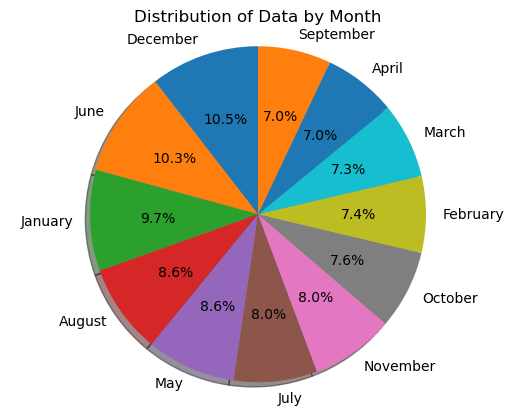

In [ ]:

month_counts = df['Month'].value_counts()
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Distribution of Data by Month")
plt.axis('equal') 
plt.show()

# over 2015

In [19]:
df_2015=df[df["year"]==2015.0][["Date","Revenue","day","year","month","Month"]]
df_2015["Revenue"].sum(axis=0)


941617.0

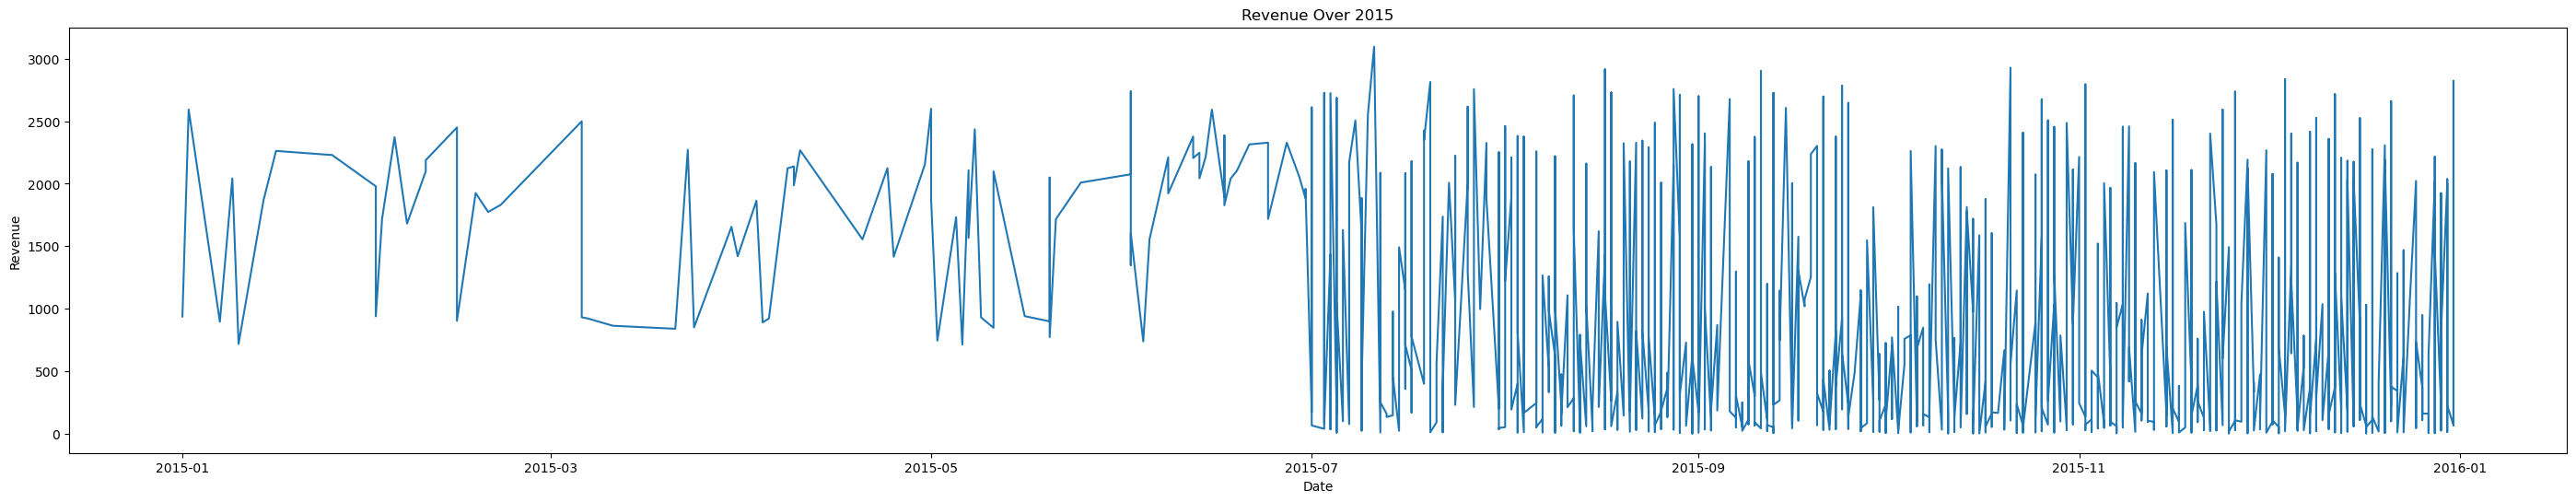

In [20]:
plt.figure(figsize=(35,6))
plt.plot(df_2015["Date"],df_2015["Revenue"])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue Over 2015")

plt.show()

# over 2016

In [21]:
df_2016=df[df["year"]==2016.0][["Date","Revenue","day","year","month"]]
df_2016["Revenue"].sum(axis=0)

869770.0

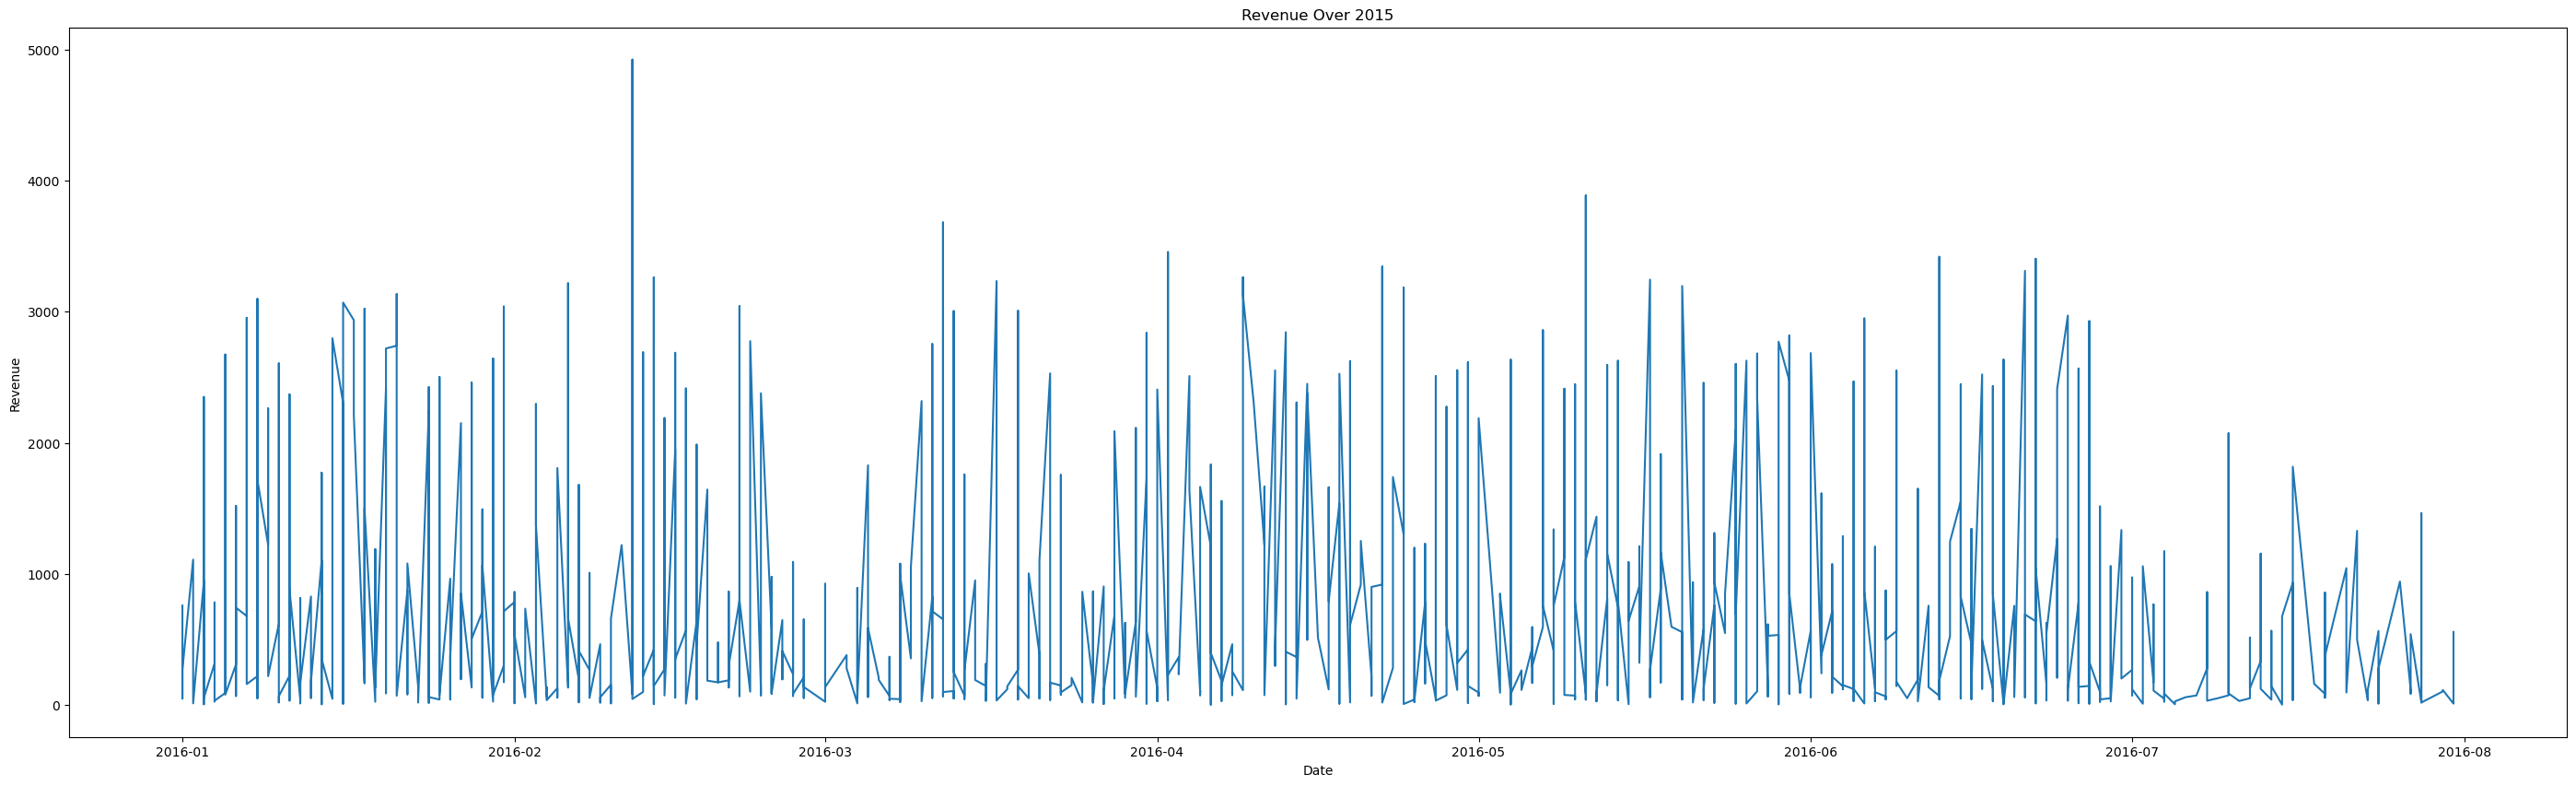

In [22]:
plt.figure(figsize=(35,10))
plt.plot(df_2016["Date"],df_2016["Revenue"])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue Over 2015")

plt.show()

# over month

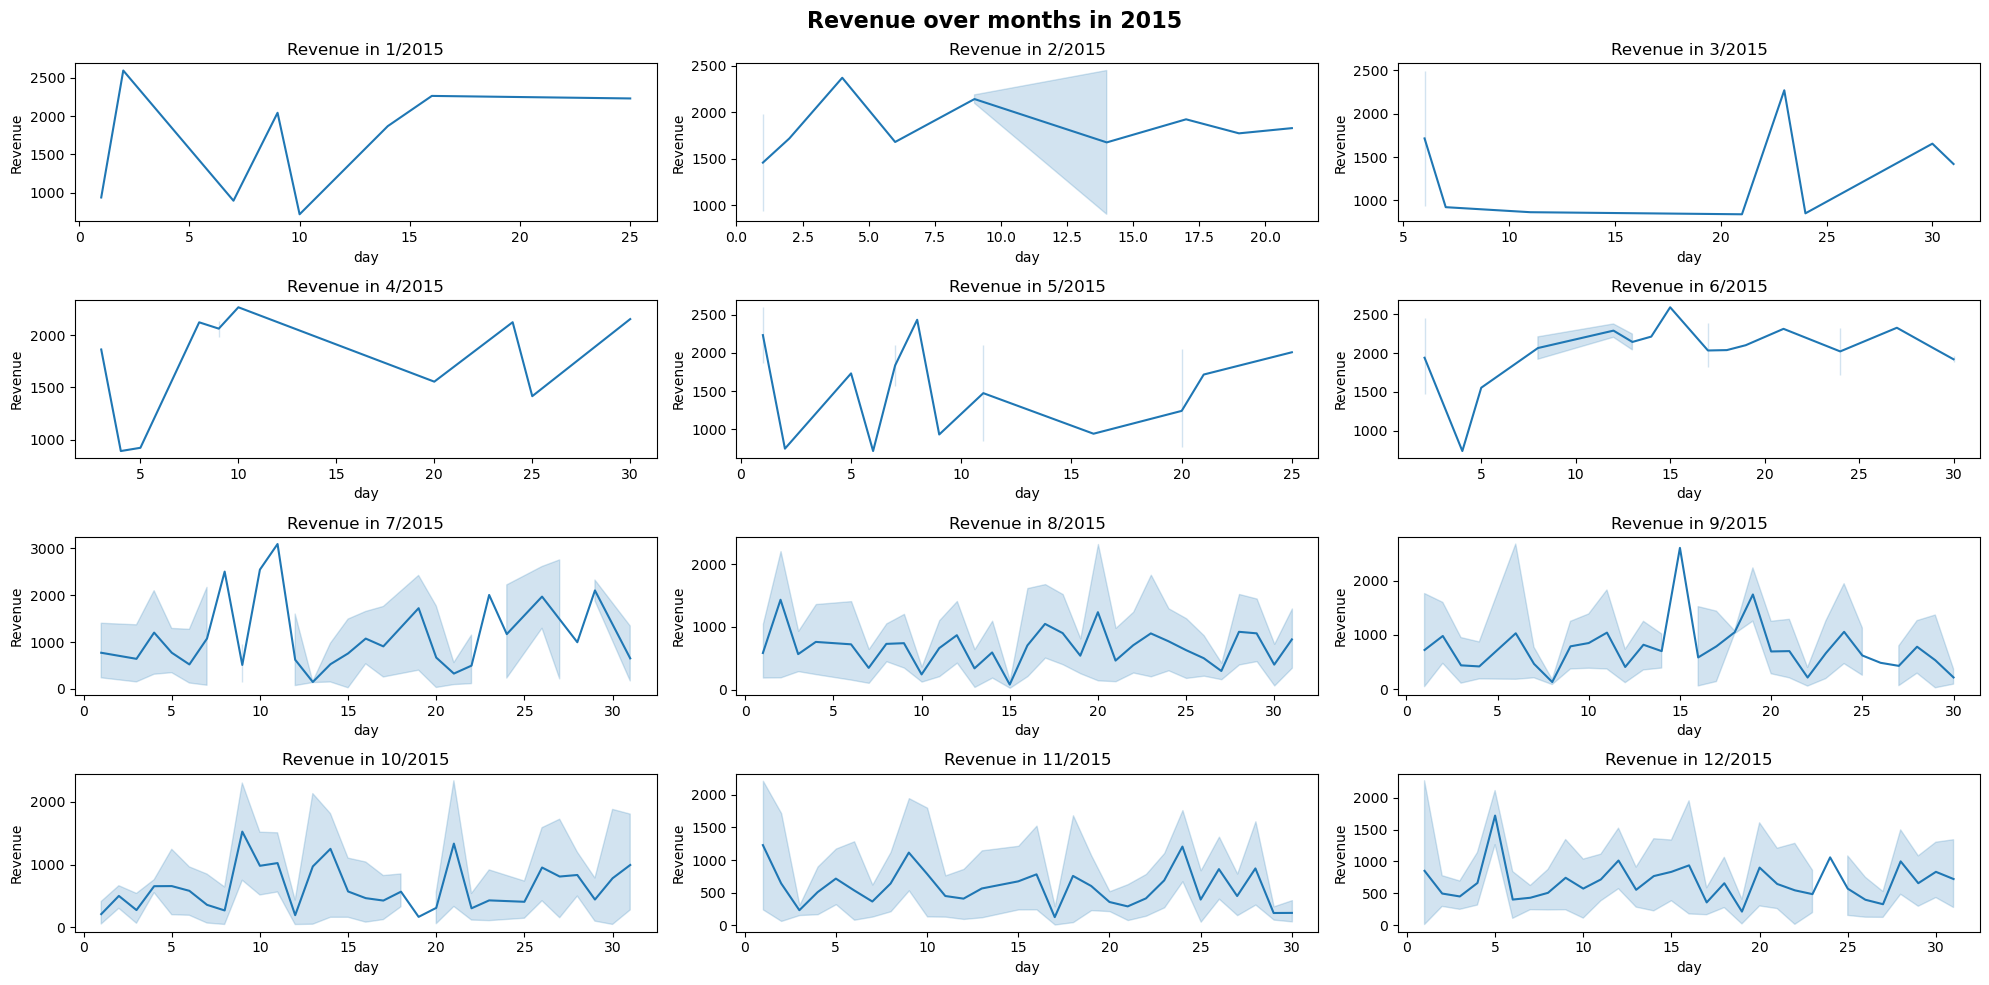

In [23]:
fig, axes=plt.subplots(4 , 3,figsize=((20,10)))
axes=axes.flatten()

for month in range (1,13):
    ax=axes[month-1]
    x_axis=df_2015[df_2015["month"]==month]
    sns.lineplot(data=x_axis,x="day",y="Revenue",ax=ax)
    ax.set_title(f"Revenue in {month}/2015")
    plt.suptitle("Revenue over months in 2015",fontsize=16,fontweight="bold")
    
plt.tight_layout()
plt.show()


In [24]:
df_2016["month"].unique()

array([1, 2, 3, 4, 5, 6, 7])

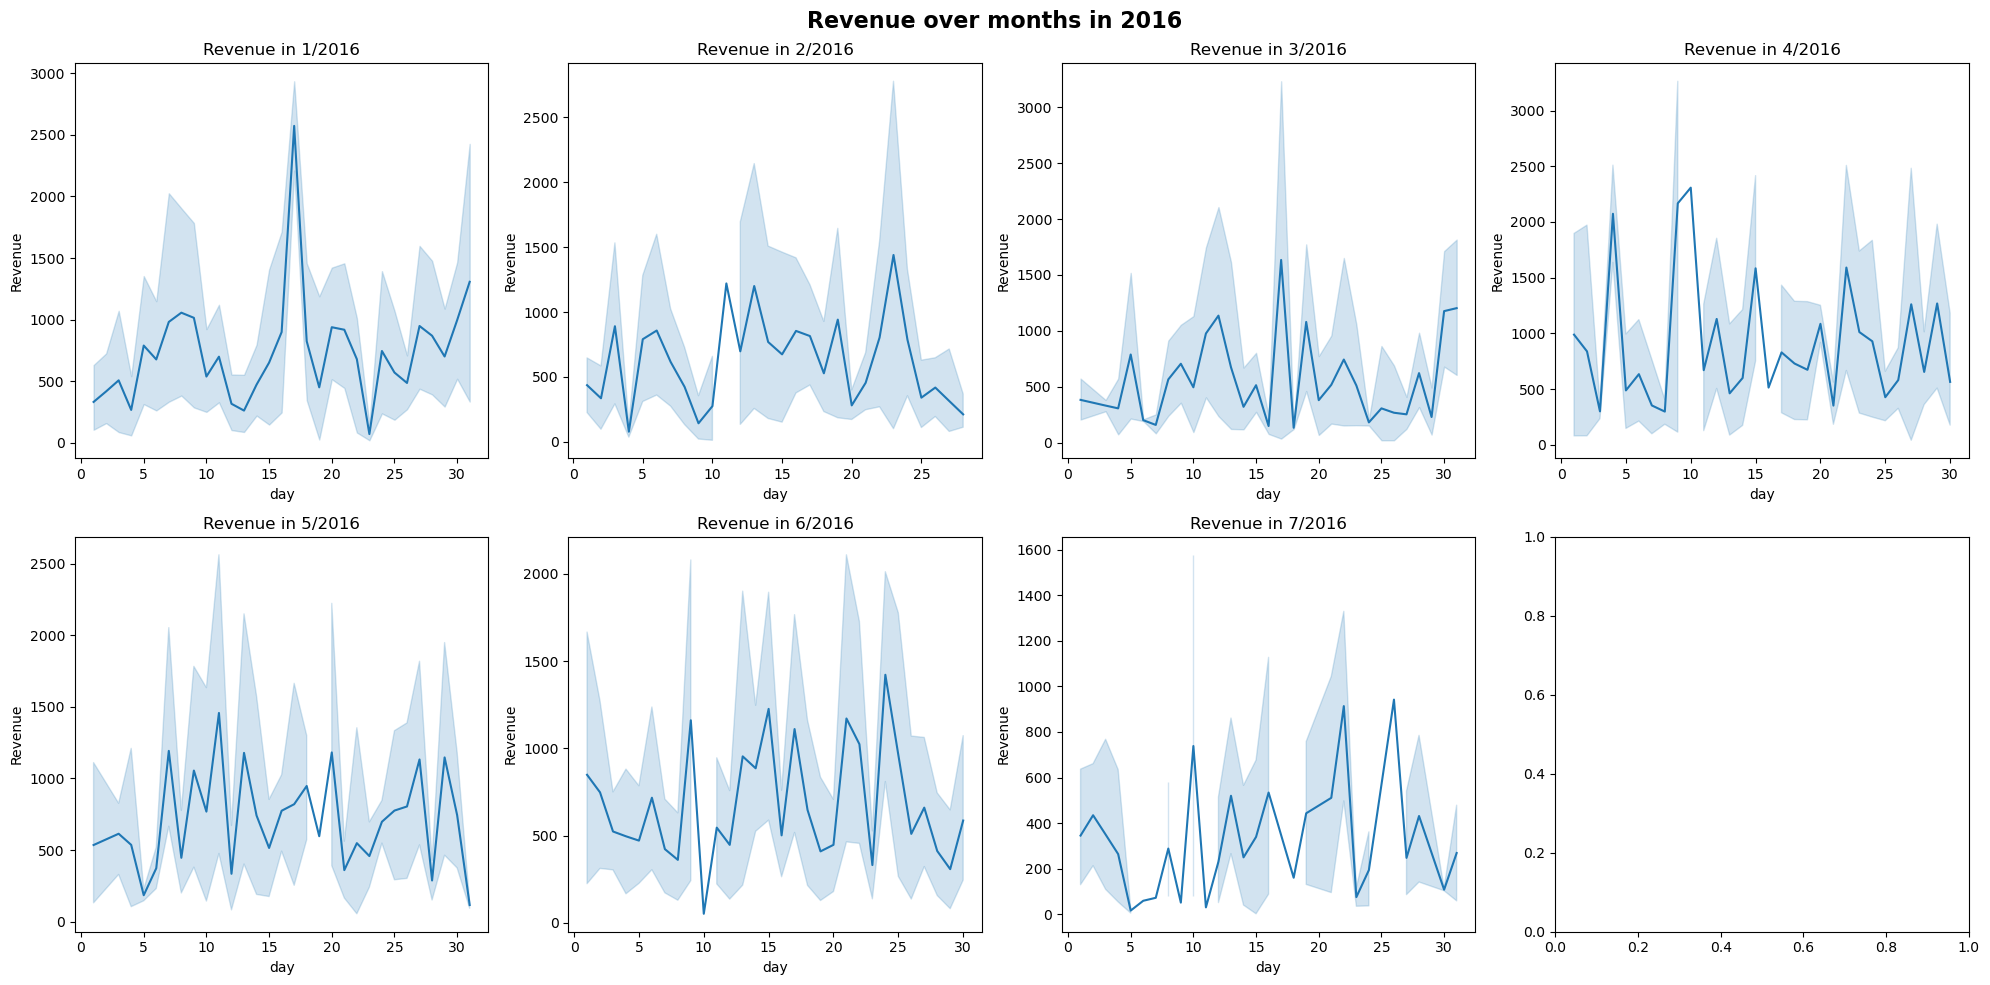

In [25]:
fig, axes=plt.subplots(2,4,figsize=(20,10))
axes=axes.flatten()
for month in range(1,8):
    ax=axes[month-1]
    data=df_2016[df_2016["month"]==month]
    sns.lineplot(data=data,x="day",y="Revenue",ax=ax)
    ax.set_title(f"Revenue in {month}/2016")
    plt.suptitle("Revenue over months in 2016",fontsize=16,fontweight="bold")
    
plt.tight_layout()
plt.show()

# over Age

<Figure size 3500x1000 with 0 Axes>

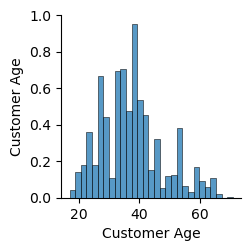

In [26]:
plt.figure(figsize=(35,10))
sns.pairplot(df,vars=["Customer Age"])
plt.show()

In [27]:
df.head()

,Date,day,month,Month,year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2015-01-01,1,1,January,2015,19.0,F,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0
1,2015-01-02,2,1,January,2015,27.0,F,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0
2,2015-01-07,7,1,January,2015,19.0,M,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0
3,2015-01-09,9,1,January,2015,24.0,F,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0
4,2015-01-10,10,1,January,2015,27.0,M,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0


# gender

In [28]:
gender_count=df["Customer Gender"].value_counts().reset_index()
gender_count.columns = ["Customer Gender", "count"] 


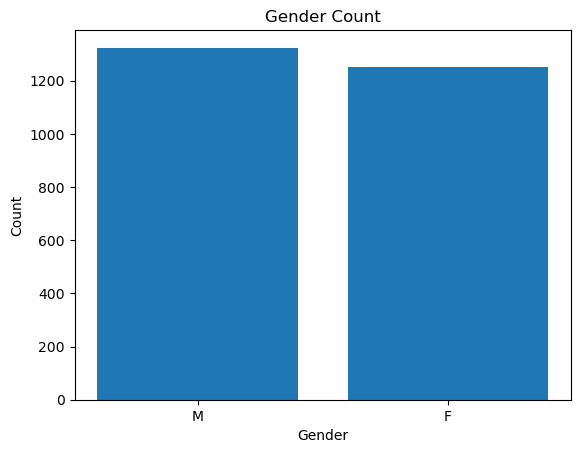

In [29]:
plt.bar(gender_count["Customer Gender"], gender_count["count"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

# gender encoding

In [30]:
label=LabelEncoder()
df["Customer Gender"]=label.fit_transform(df["Customer Gender"])
df.head()

,Date,day,month,Month,year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2015-01-01,1,1,January,2015,19.0,0,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0
1,2015-01-02,2,1,January,2015,27.0,0,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0
2,2015-01-07,7,1,January,2015,19.0,1,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0
3,2015-01-09,9,1,January,2015,24.0,0,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0
4,2015-01-10,10,1,January,2015,27.0,1,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0


# feature extraction

# get profit

<Axes: xlabel='Date', ylabel='profit'>

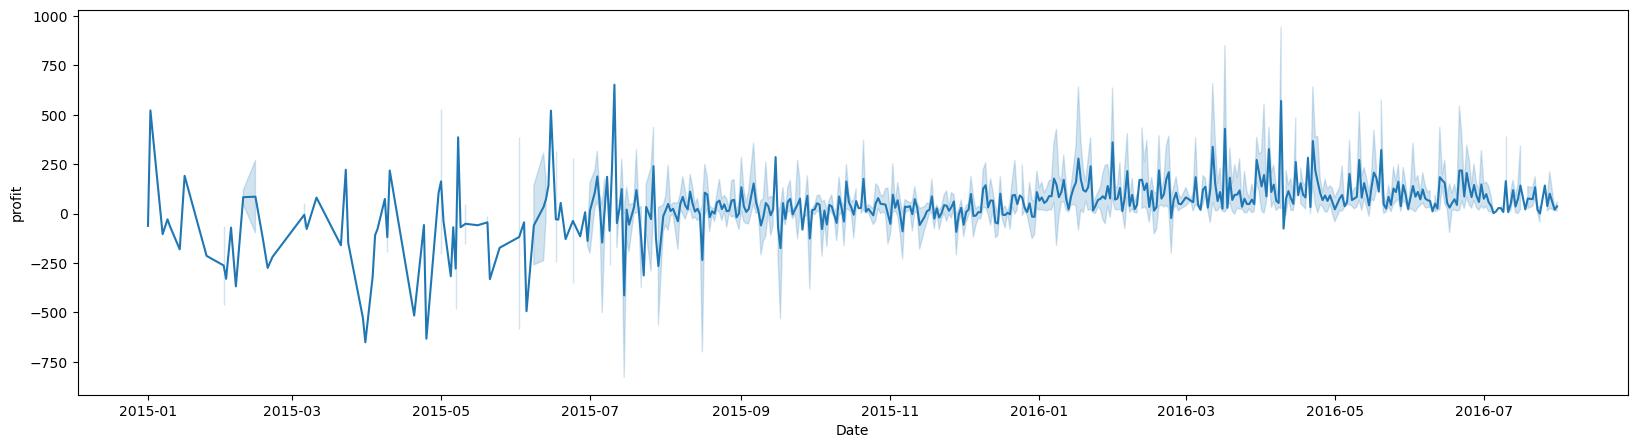

In [31]:
df["profit"]=df["Revenue"]-df["Cost"]
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x="Date",y="profit")

# EDA (Exploration data analysis)

# country

sales with quantity

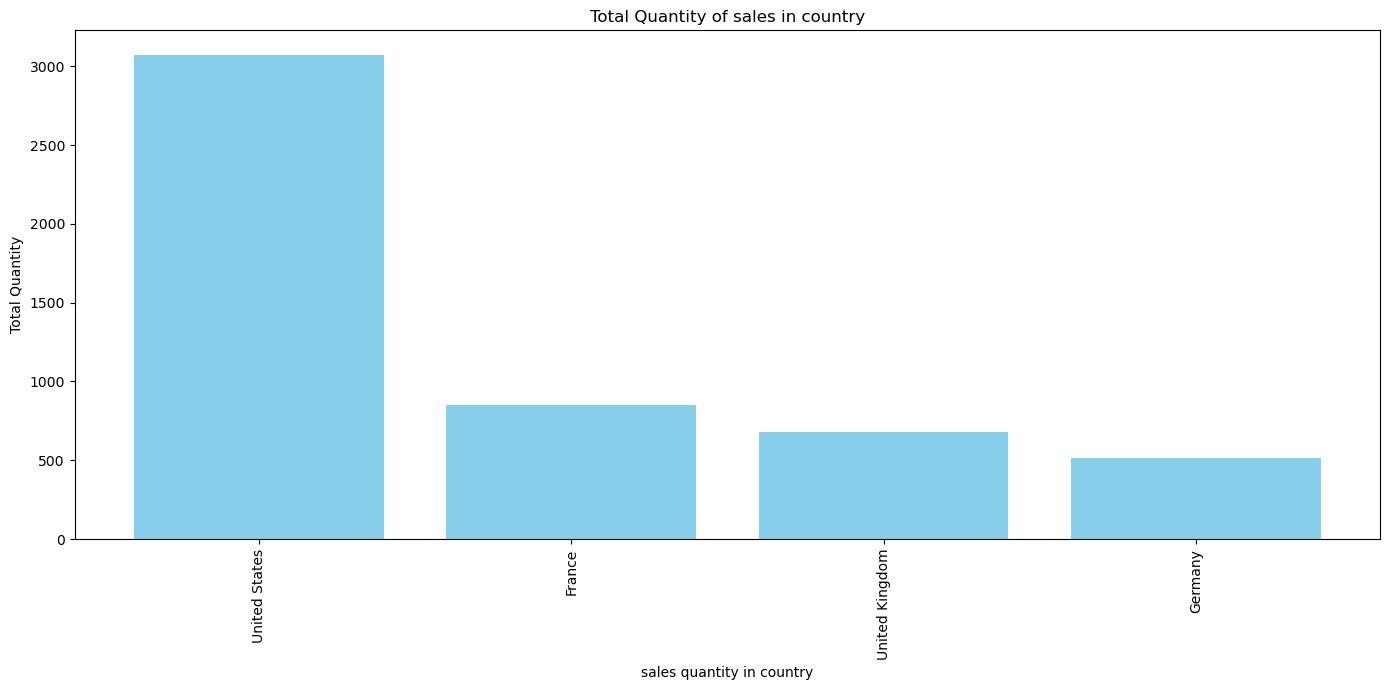

In [32]:
sum_quantity_per_subcategory = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
plt.bar(sum_quantity_per_subcategory.index, sum_quantity_per_subcategory.values, color='skyblue')

plt.xlabel("sales quantity in country")
plt.ylabel("Total Quantity")
plt.title("Total Quantity of sales in country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

sales with profit

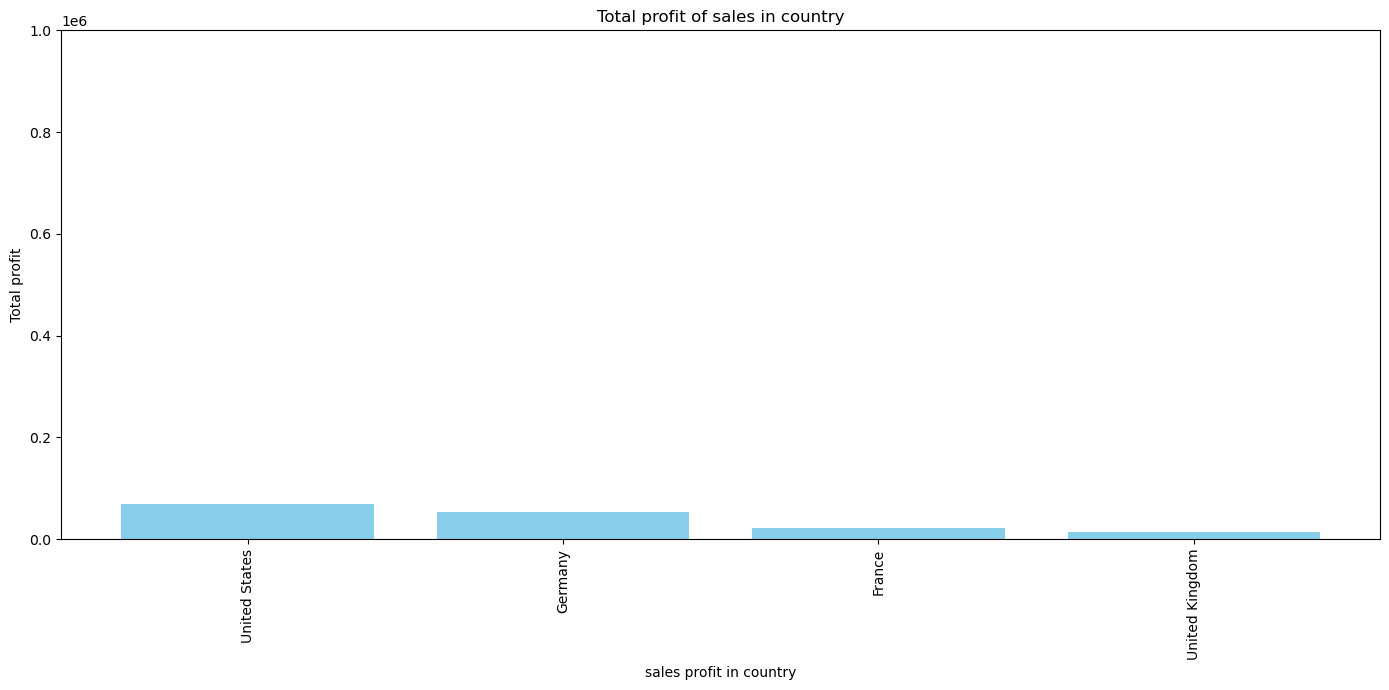

In [33]:
sum_profit_per_subcategory = df.groupby("Country")["profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
plt.bar(sum_profit_per_subcategory.index, sum_profit_per_subcategory.values, color='skyblue')
plt.xlabel("sales profit in country")
plt.ylabel("Total profit")
plt.title("Total profit of sales in country")
plt.xticks(rotation=90)
plt.ylim(0,1000000)
plt.tight_layout()
plt.show()

# all state in the country

state with quantity of sales

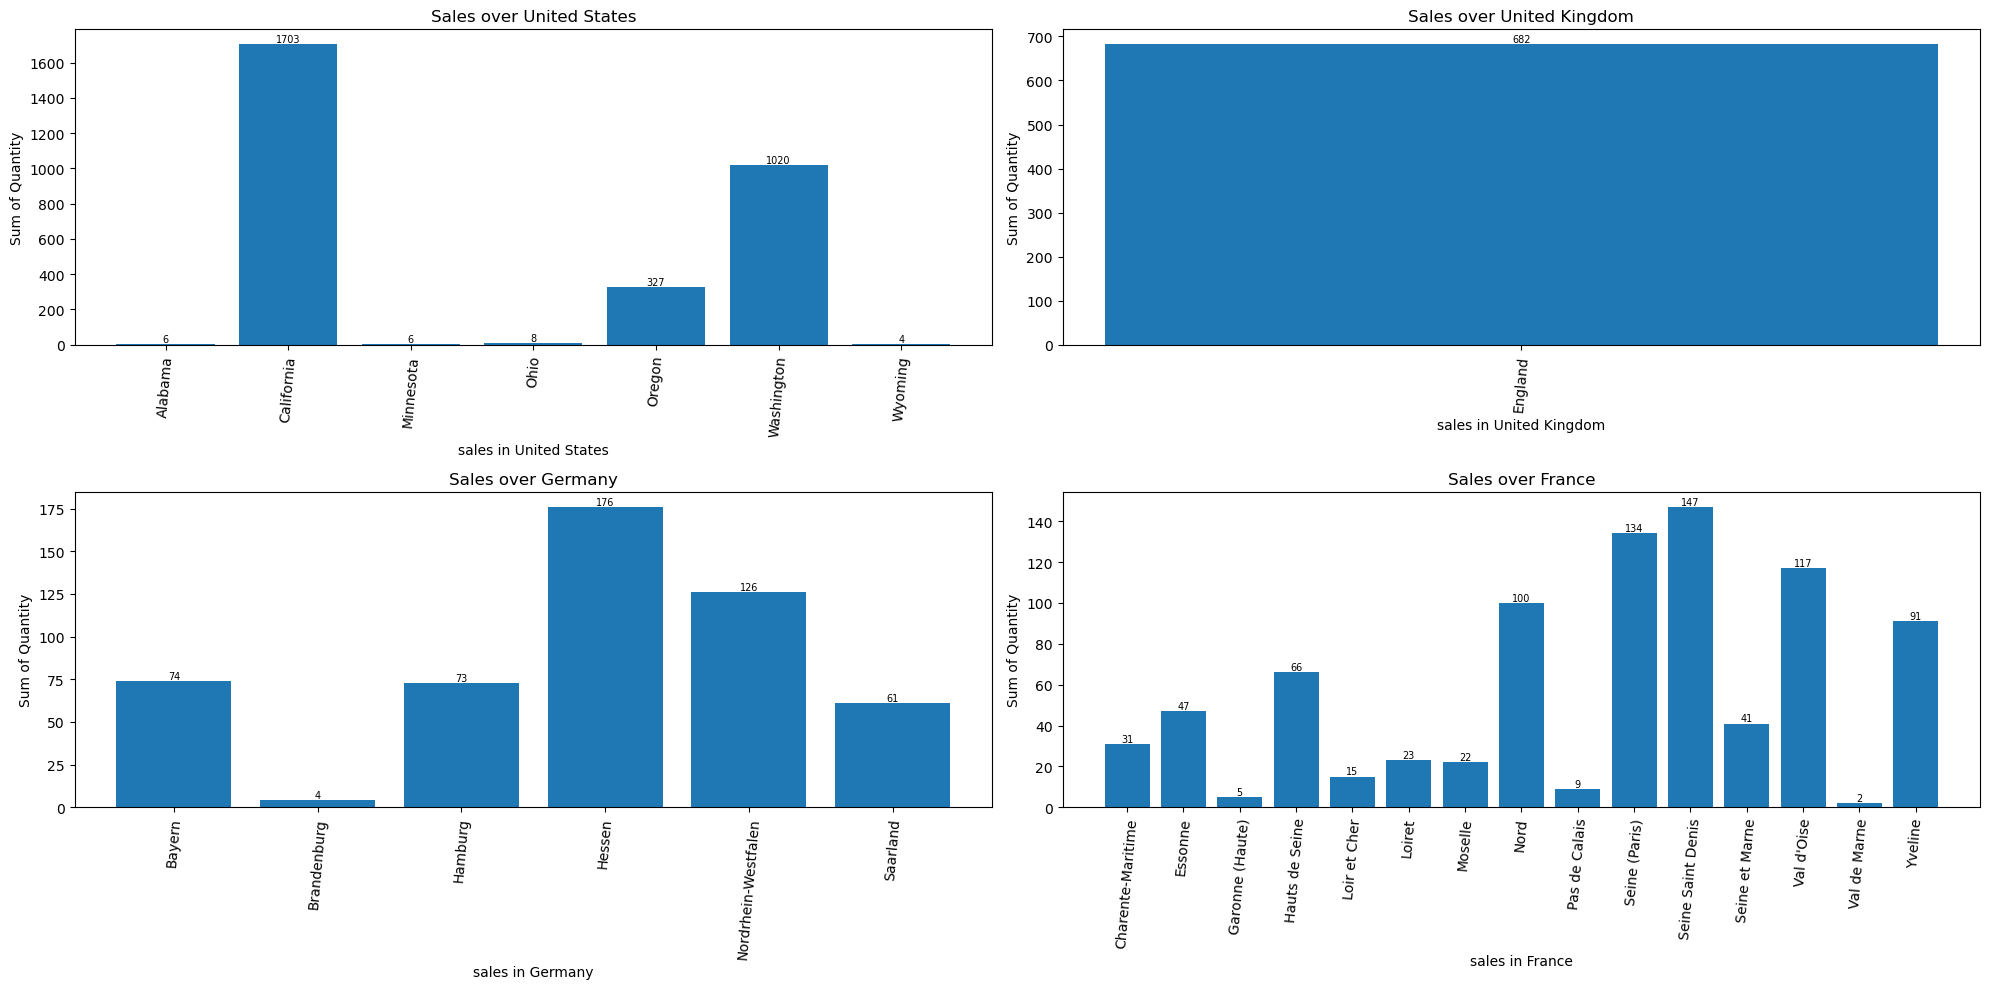

In [34]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
axes=axes.flatten()
country=['United States','United Kingdom', 'Germany','France']
var=0
for cou in country:
    ax=axes[var]
    var=var+1
    quantity_state = df[df["Country"]==cou].groupby("State")["Quantity"].sum().reset_index()
    ax.bar(quantity_state["State"], quantity_state["Quantity"])
    ax.set_xlabel(f"sales in {cou}")
    ax.set_ylabel("Sum of Quantity")
    ax.tick_params(axis='x', rotation=85)
    ax.set_title(f"Sales over {cou}")
    for j, v in enumerate(quantity_state["Quantity"]):
        ax.text(j, v + 0.1, str(int(v)), ha='center', va='bottom', fontsize=7)
plt.tight_layout()
plt.show()

with profit

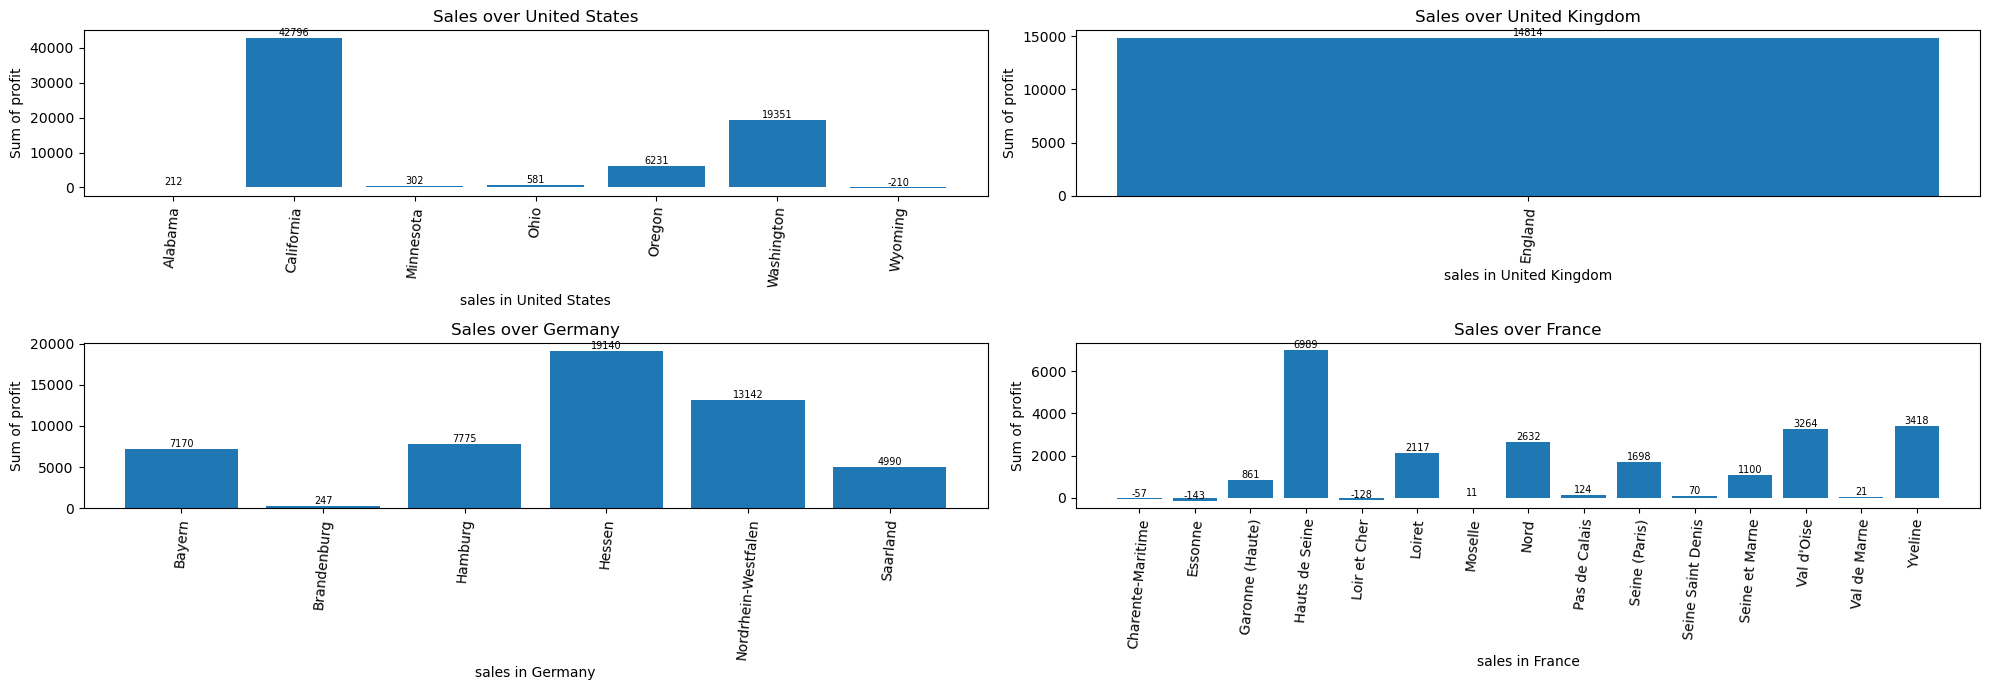

In [35]:
fig,axes=plt.subplots(2,2,figsize=(20,7))
axes=axes.flatten()
country=['United States','United Kingdom', 'Germany','France']
var=0
for cou in country:
    ax=axes[var]
    var=var+1
    quantity_state = df[df["Country"]==cou].groupby("State")["profit"].sum().reset_index()
    ax.bar(quantity_state["State"], quantity_state["profit"])
    ax.set_xlabel(f"sales in {cou}")
    ax.set_ylabel("Sum of profit")
    ax.tick_params(axis='x', rotation=85)
    ax.set_title(f"Sales over {cou}")
    for j, v in enumerate(quantity_state["profit"]):
        ax.text(j, v + 0.1, str(int(v)), ha='center', va='bottom', fontsize=7)
plt.tight_layout()
plt.show()

# main product

 Quantity over main product

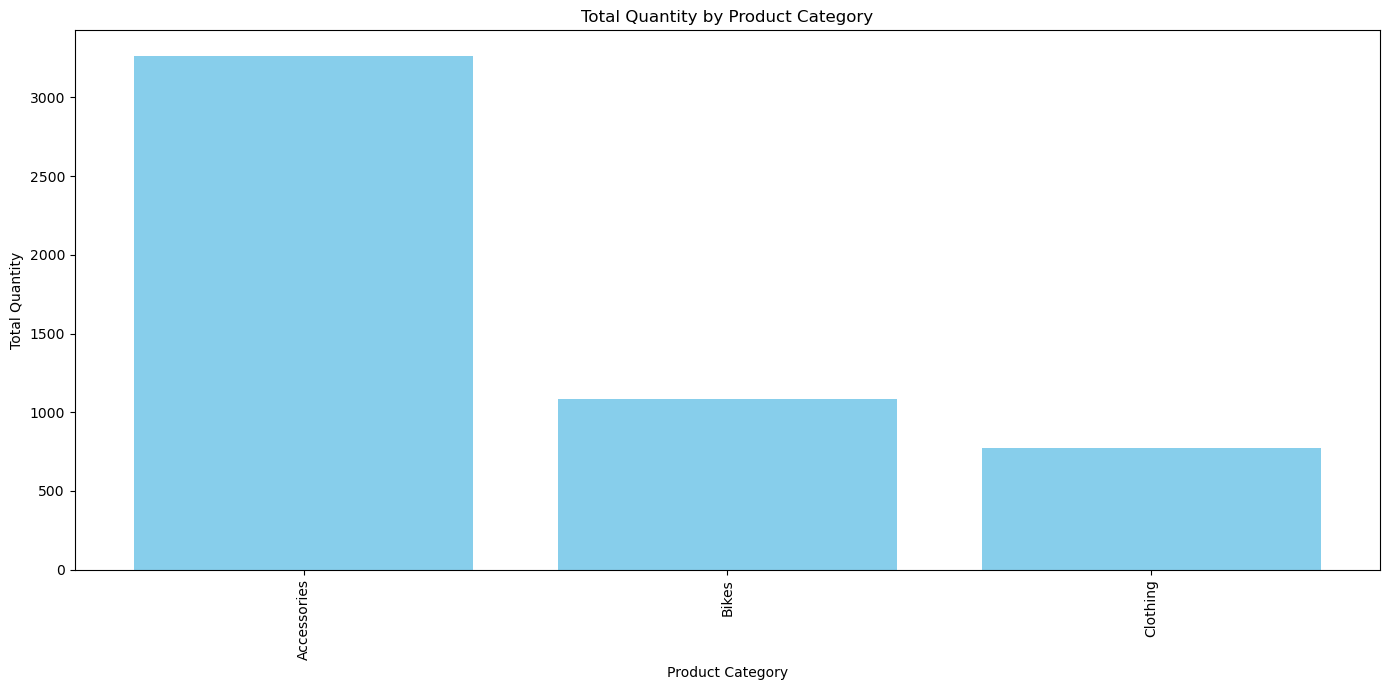

In [36]:
sum_quantity_per_subcategory = df.groupby("Product Category")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
plt.bar(sum_quantity_per_subcategory.index, sum_quantity_per_subcategory.values, color='skyblue')

plt.xlabel("Product Category")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Product Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

the profit over product

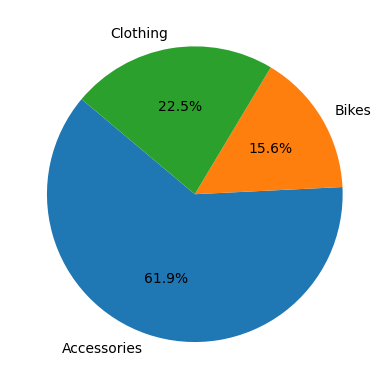

In [37]:
Accessories=df[df["Product Category"]=="Accessories"]["profit"].sum()
Bikes=df[df["Product Category"]=="Bikes"]["profit"].sum()
Clothing=df[df["Product Category"]=="Clothing"]["profit"].sum()
categories = ["Accessories", "Bikes", "Clothing"]
profits = [Accessories, Bikes, Clothing]
plt.pie(profits, labels=categories, autopct='%1.1f%%', startangle=140)
plt.show()

show with value

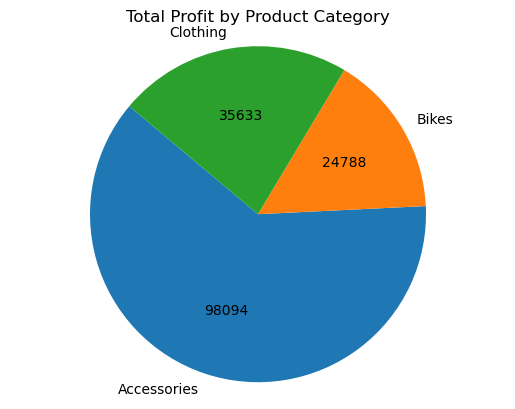

In [38]:
def show_values(pct, all_vals):
    absolute = int(pct/100.*sum(all_vals))
    return f"{absolute}"
plt.pie(
    profits,
    labels=categories,
    autopct=lambda pct: show_values(pct, profits),
    startangle=140
)
plt.title("Total Profit by Product Category")
plt.axis('equal')
plt.show()

as you show the accessories is the best State with the big profit

# go over main product with (sub category)

In [39]:
df.head()

,Date,day,month,Month,year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,profit
0,2015-01-01,1,1,January,2015,19.0,0,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0,-62.0
1,2015-01-02,2,1,January,2015,27.0,0,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0,522.0
2,2015-01-07,7,1,January,2015,19.0,1,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0,-104.0
3,2015-01-09,9,1,January,2015,24.0,0,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0,-29.0
4,2015-01-10,10,1,January,2015,27.0,1,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0,-64.0


In [40]:
df["Sub Category"].unique()

array(['Road Bikes', 'Mountain Bikes', 'Bottles and Cages', 'Helmets',
       'Tires and Tubes', 'Jerseys', 'Caps', 'Hydration Packs',
       'Touring Bikes', 'Cleaners', 'Socks', 'Vests', 'Bike Stands',
       'Fenders', 'Gloves', 'Bike Racks'], dtype=object)

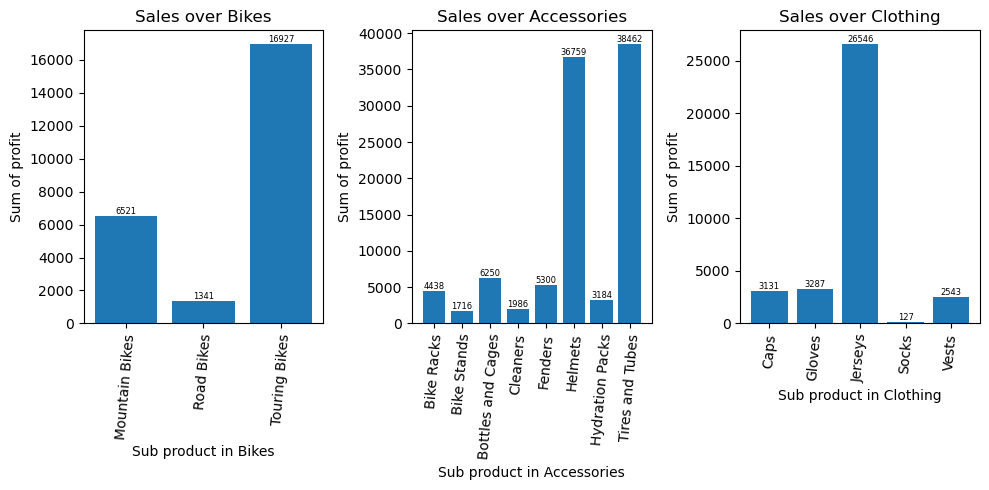

In [41]:
profit=df.groupby(["Product Category","Sub Category"])["profit"].sum().reset_index()
fig,axes=plt.subplots(1,3,figsize=(10,5))
axes=axes.flatten()
products=['Bikes', 'Accessories', 'Clothing']
var=0
for product in products:
    ax=axes[var]
    var=var+1
    profit_product=profit[profit["Product Category"]==product][["profit","Sub Category"]]
    ax.bar(profit_product["Sub Category"], profit_product["profit"])
    ax.set_xlabel(f"Sub product in {product}")
    ax.set_ylabel("Sum of profit")
    ax.set_xticks(profit_product["Sub Category"])  
    ax.set_xticklabels(profit_product["Sub Category"], rotation=85)
    ax.set_title(f"Sales over {product}")
    for j,v in enumerate(profit_product["profit"]):
        ax.text(j,v+1,str(int(v)),ha="center",va="bottom",fontsize=6)
plt.tight_layout()
plt.show()

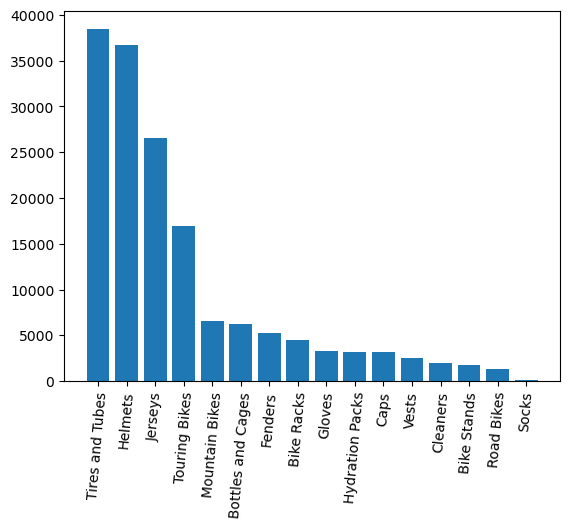

In [42]:
total_profit_by_subcategory = df.groupby("Sub Category")["profit"].sum().reset_index()
total_profit_by_subcategory=total_profit_by_subcategory.sort_values(by="profit",ascending=False)
plt.bar(total_profit_by_subcategory["Sub Category"],total_profit_by_subcategory["profit"])
plt.xticks(rotation=85)
plt.show()

Quantity over sub product

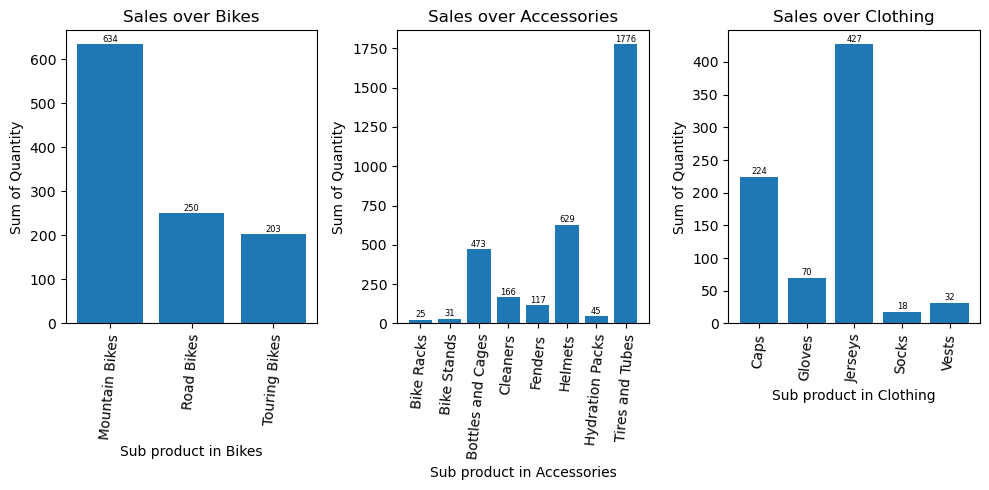

In [43]:
profit=df.groupby(["Product Category","Sub Category"])["Quantity"].sum().reset_index()
fig,axes=plt.subplots(1,3,figsize=(10,5))
axes=axes.flatten()
products=['Bikes', 'Accessories', 'Clothing']
var=0
for product in products:
    ax=axes[var]
    var=var+1
    profit_product=profit[profit["Product Category"]==product][["Quantity","Sub Category"]]
    ax.bar(profit_product["Sub Category"], profit_product["Quantity"])
    ax.set_xlabel(f"Sub product in {product}")
    ax.set_ylabel("Sum of Quantity")
    ax.set_xticks(profit_product["Sub Category"])  
    ax.set_xticklabels(profit_product["Sub Category"], rotation=85)
    ax.set_title(f"Sales over {product}")
    for j,v in enumerate(profit_product["Quantity"]):
        ax.text(j,v+1,str(int(v)),ha="center",va="bottom",fontsize=6)
plt.tight_layout()
plt.show()

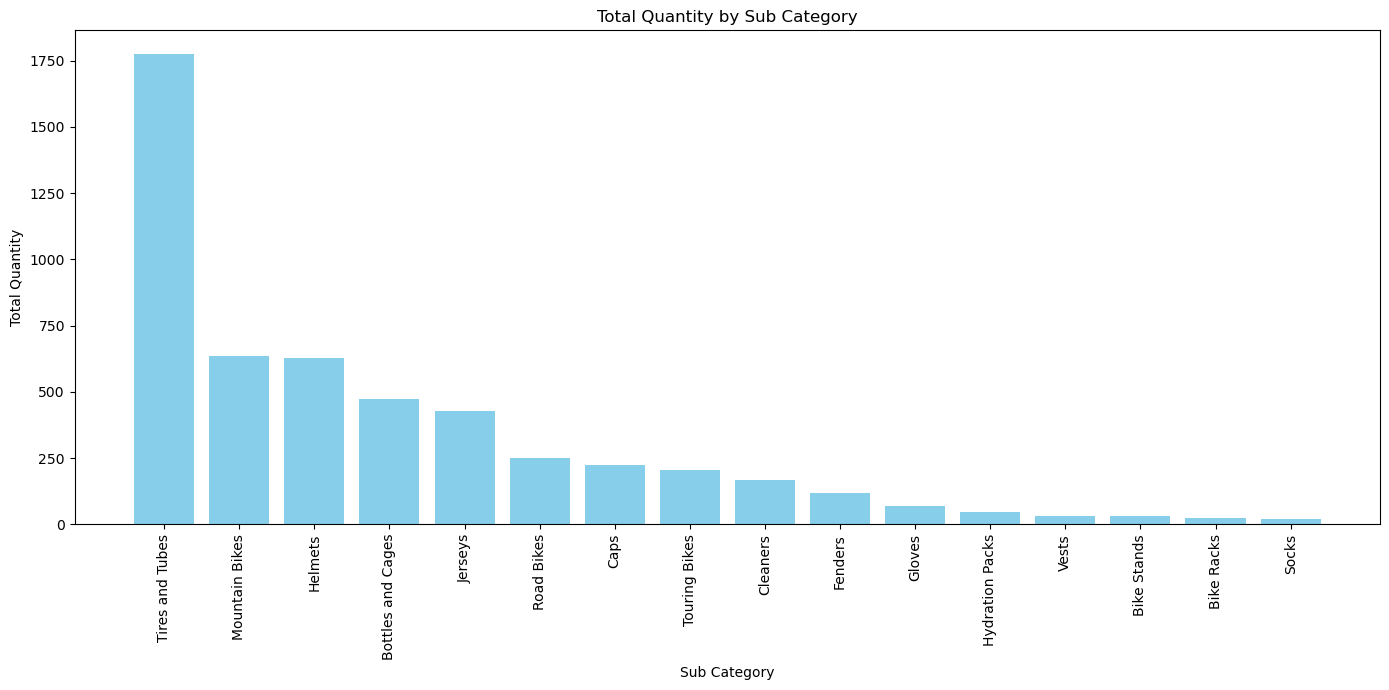

In [44]:
sum_quantity_per_subcategory = df.groupby("Sub Category")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
plt.bar(sum_quantity_per_subcategory.index, sum_quantity_per_subcategory.values, color='skyblue')

plt.xlabel("Sub Category")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Sub Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# country with product 

main

In [45]:
df.head()

,Date,day,month,Month,year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,profit
0,2015-01-01,1,1,January,2015,19.0,0,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0,-62.0
1,2015-01-02,2,1,January,2015,27.0,0,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0,522.0
2,2015-01-07,7,1,January,2015,19.0,1,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0,-104.0
3,2015-01-09,9,1,January,2015,24.0,0,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0,-29.0
4,2015-01-10,10,1,January,2015,27.0,1,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0,-64.0


In [46]:
countrcountry_main_product = df[["Country", "Product Category"]].value_counts().reset_index(name="count")
countrcountry_main_product

,Country,Product Category,count
0,United States,Accessories,1099
1,United States,Clothing,238
2,France,Accessories,233
3,United States,Bikes,212
4,United Kingdom,Accessories,174
5,Germany,Accessories,147
6,France,Bikes,139
7,United Kingdom,Bikes,112
8,Germany,Bikes,65
9,France,Clothing,58


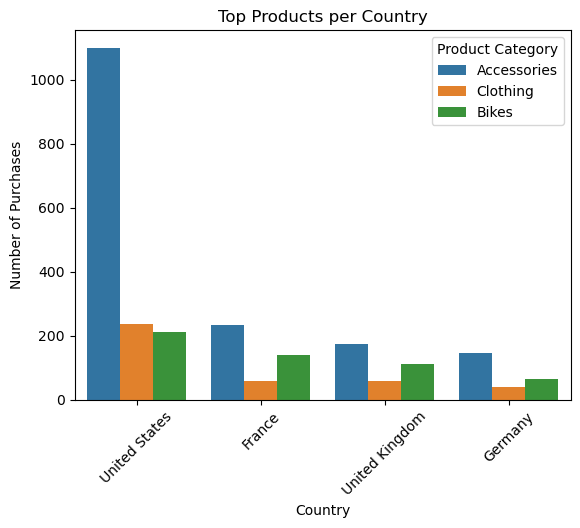

In [47]:
sns.barplot(
    data=countrcountry_main_product,
    x='Country',
    y='count',
    hue='Product Category'
)
plt.title('Top Products per Country')
plt.ylabel('Number of Purchases')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

sub

In [48]:
df.head()

,Date,day,month,Month,year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,profit
0,2015-01-01,1,1,January,2015,19.0,0,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0,-62.0
1,2015-01-02,2,1,January,2015,27.0,0,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0,522.0
2,2015-01-07,7,1,January,2015,19.0,1,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0,-104.0
3,2015-01-09,9,1,January,2015,24.0,0,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0,-29.0
4,2015-01-10,10,1,January,2015,27.0,1,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0,-64.0


In [49]:
countrcountry_main_product = df[["Country","Sub Category"]].value_counts().reset_index(name="count")
countrcountry_main_product

,Country,Sub Category,count
0,United States,Tires and Tubes,707
1,United States,Helmets,166
2,United States,Mountain Bikes,133
3,United States,Jerseys,126
4,France,Mountain Bikes,91
5,France,Tires and Tubes,87
6,United States,Cleaners,76
7,France,Bottles and Cages,74
8,United States,Road Bikes,71
9,United Kingdom,Tires and Tubes,64


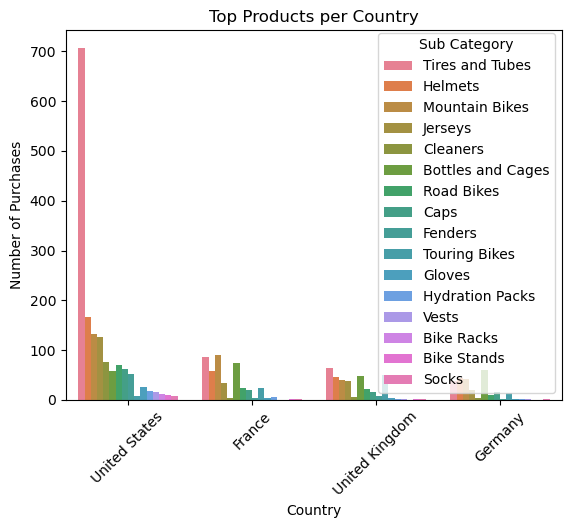

In [50]:
sns.barplot(
    data=countrcountry_main_product,
    x='Country',
    y='count',
    hue='Sub Category'
)
plt.title('Top Products per Country')
plt.ylabel('Number of Purchases')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# State and product

In [51]:
df.head()

,Date,day,month,Month,year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,profit
0,2015-01-01,1,1,January,2015,19.0,0,United States,Washington,Bikes,Road Bikes,1.0,1000.00,938.000000,1000.0,938.0,-62.0
1,2015-01-02,2,1,January,2015,27.0,0,Germany,Hessen,Bikes,Mountain Bikes,1.0,2071.00,2593.000000,2071.0,2593.0,522.0
2,2015-01-07,7,1,January,2015,19.0,1,United States,Oregon,Bikes,Road Bikes,1.0,1000.00,896.000000,1000.0,896.0,-104.0
3,2015-01-09,9,1,January,2015,24.0,0,United States,California,Bikes,Mountain Bikes,3.0,690.33,680.666667,2071.0,2042.0,-29.0
4,2015-01-10,10,1,January,2015,27.0,1,United States,Washington,Bikes,Road Bikes,2.0,391.50,359.500000,783.0,719.0,-64.0


In [52]:
countrcountry_sub_product = df[["State", "Product Category"]].value_counts().reset_index(name="count")
countrcountry_sub_product

,State,Product Category,count
0,California,Accessories,624
1,Washington,Accessories,366
2,England,Accessories,174
3,California,Clothing,142
4,England,Bikes,112
...,...,...,...
68,Garonne (Haute),Accessories,1
69,Wyoming,Accessories,1
70,Wyoming,Bikes,1
71,Brandenburg,Bikes,1


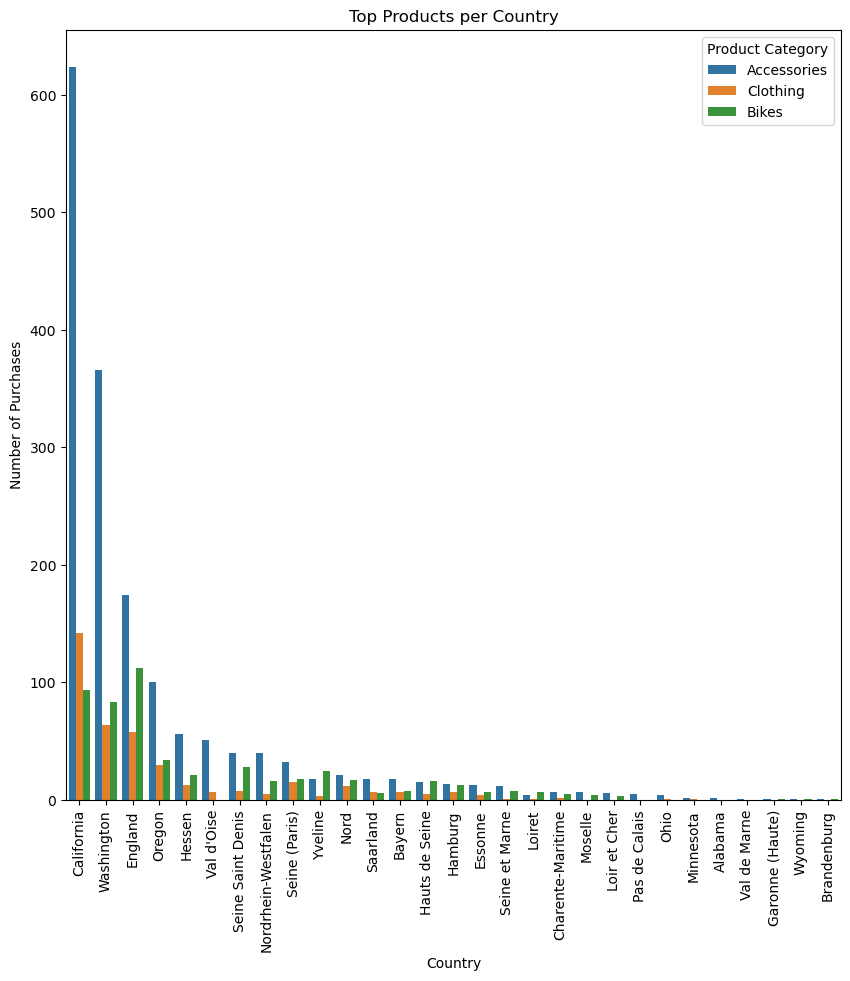

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(
    data=countrcountry_sub_product,
    x='State',
    y='count',
    hue='Product Category'
)
plt.title('Top Products per Country')
plt.ylabel('Number of Purchases')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

# After all 


BY:"OMAR SHOHIEB"